In [4]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [11]:
docs = ['There is a boy.', 'The boy is very pretty.'] # 처리 전의 자연어

data = [] # 단어단위 데이터 리스트
for s in docs:
    s2 = s.replace('.','') # 실제 자연어에서는 거의 모든 특수문자에대해서 이런 처리가 필요함
    s2 = s2.lower()
    data+=s2.split() # 마침표를 제거하고 대문자를 소문자로 바꾼뒤 단어단위로 저장

data

['there', 'is', 'a', 'boy', 'the', 'boy', 'is', 'very', 'pretty']

In [13]:
bow = {}  # 숫자와 단어가 합쳐진 사전
n = 0

for word in data:
    if word not in bow:
        bow[word] = n
        n += 1
    
bow

{'there': 0, 'is': 1, 'a': 2, 'boy': 3, 'the': 4, 'very': 5, 'pretty': 6}

In [18]:
bow_reverse = {}
for key, value in bow.items():
    bow_reverse[value] = key
bow_reverse

{0: 'there', 1: 'is', 2: 'a', 3: 'boy', 4: 'the', 5: 'very', 6: 'pretty'}

In [20]:
data = [] 
for s in docs:
    s2 = s.replace('.','') 
    s2 = s2.lower()
    data.append(s2.split()) 

X = []
for doc in data:
    l = []
    for word in doc:
        l.append(bow[word])
    X.append(l)
X

[[0, 1, 2, 3], [4, 3, 1, 5, 6]]

In [62]:
from sklearn.datasets import load_files
# https://github.com/rickiepark/introduction_to_ml_with_python/blob/master/data/aclImdb_v1.tar.gz
imdb_train = load_files('aclImdb/train/')
imdb_test = load_files('aclImdb/test/')

# np.save('imdb.npy', [imdb_train, imdb_test])
# imdb_train, imdb_test = np.load('imdb.npy', allow_pickle=True)

In [63]:
len(imdb_train.data)

25000

In [64]:
text_train = [s.decode().replace('<br />', '') for s in imdb_train.data]
y_train = imdb_train.target
display(y_train.shape, y_train)

text_test = [s.decode().replace('<br />', '') for s in imdb_test.data]
y_test = imdb_test.target


(25000,)

array([1, 0, 1, ..., 0, 0, 0])

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(text_train)
X_train = vect.transform(text_train)

In [66]:
X_train   # 문장의 개수(튜플) x 단어의 개수(속성)
type(vect.vocabulary_), len(vect.vocabulary_)
vect.vocabulary_.items()

dict_items([('zero', 75669), ('day', 16986), ('leads', 38653), ('you', 75381), ('to', 68091), ('think', 67468), ('even', 23059), ('re', 54503), ('why', 73998), ('two', 69757), ('boys', 8922), ('young', 75392), ('men', 42764), ('would', 74762), ('do', 19634), ('what', 73731), ('they', 67409), ('did', 18588), ('commit', 13888), ('mutual', 45268), ('suicide', 65104), ('via', 72211), ('slaughtering', 61588), ('their', 67280), ('classmates', 12958), ('it', 35211), ('captures', 10809), ('must', 45209), ('be', 6512), ('beyond', 7341), ('bizarre', 7716), ('mode', 43993), ('of', 47352), ('being', 6852), ('for', 25839), ('humans', 32540), ('who', 73935), ('have', 30570), ('decided', 17219), ('withdraw', 74379), ('from', 26582), ('common', 13907), ('civility', 12845), ('in', 33505), ('order', 47900), ('define', 17460), ('own', 48610), ('world', 74699), ('coupled', 15414), ('destruction', 18214), ('is', 35099), ('not', 46714), ('perfect', 49947), ('movie', 44779), ('but', 10096), ('given', 28034),

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [68]:
X_test = vect.transform(text_test)
X_test.shape

(25000, 75911)

In [75]:
model = LogisticRegression(C = 0.1, max_iter= 500)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=500)

In [76]:
score = model.score(X_test, y_test)
score

0.8788

In [77]:
score = model.score(X_train, y_train)
score

0.97508

In [80]:
a = np.sort(model.coef_[0])
a

array([-1.391025  , -1.35312359, -1.08427164, ...,  0.74400691,
        0.80179211,  0.85669354])

In [81]:
w = model.coef_[0]
type(w), w.shape


(numpy.ndarray, (75911,))

In [82]:
fn = np.array(vect.get_feature_names())

In [83]:
indexer = w.argsort()

fn[indexer[:20]] # 큰 음수값들, 즉 부정적인 영향을 끼침

array(['worst', 'waste', 'awful', 'disappointment', 'poorly', 'boring',
       'lacks', 'disappointing', 'mess', 'horrible', 'avoid', 'worse',
       'fails', 'dull', 'save', 'poor', 'laughable', 'unfortunately',
       'terrible', 'lame'], dtype='<U74')

In [84]:
fn[indexer[-1:-21:-1]] # 큰 양수값들, 즉 긍정적인 영향을 끼침

array(['excellent', 'perfect', 'refreshing', 'superb', 'wonderfully',
       'funniest', 'surprisingly', 'wonderful', 'rare', 'favorite',
       'enjoyable', 'amazing', 'loved', 'today', 'highly', 'incredible',
       'enjoyed', 'subtle', 'brilliant', 'gem'], dtype='<U74')

In [85]:
np.r_[indexer[:20], indexer[-20:]]

array([74748, 73247,  5431, 18945, 51563,  8716, 37995, 18942, 42981,
       32153,  5371, 74731, 23922, 20703, 58449, 51560, 38480, 70617,
       67049, 38140, 27483,  9324, 64928, 22258, 33725, 31393, 68119,
       40162,  3067, 22256, 24367, 54296, 74538, 65531, 26787, 74540,
       65279, 55137, 49947, 23260], dtype=int64)

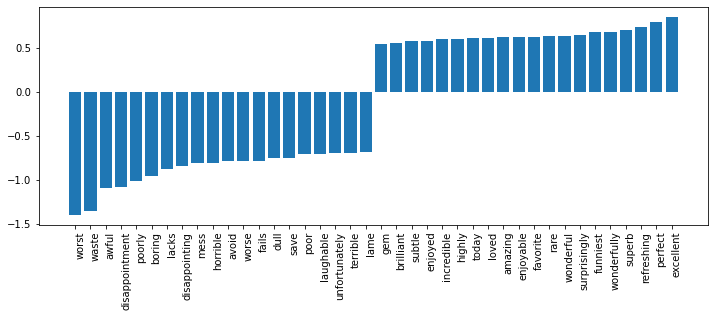

In [86]:
plt.figure(figsize=[12,4])
plt.bar(range(40),w[np.r_[indexer[:20],indexer[-20:]]])
plt.xticks(range(40), np.r_[fn[indexer[:20]], fn[indexer[-20:]]], rotation=90, ha='left')
print('')